<a href="https://www.kaggle.com/code/mnik55/credit-card-fraud-detection?scriptVersionId=202980258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [67]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, confusion_matrix, auc, average_precision_score, roc_auc_score

In [69]:
csv_path = "/kaggle/input/creditcardfraud/creditcard.csv"

df = pd.read_csv(csv_path)
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
166898,118373.0,0.058976,0.340972,-0.173571,-2.145293,0.009466,-0.279365,-0.720330,-2.869735,-1.765773,...,-1.212018,0.447438,-0.203604,-0.309393,1.049426,-0.296009,0.034704,0.220170,13.79,0
245450,152758.0,-0.870554,0.845666,0.125394,-0.716123,-0.057486,0.054850,0.317599,0.196778,0.546328,...,-0.103527,-0.281426,0.190728,-1.014022,-0.466790,-0.678729,-0.516707,0.049253,62.48,0
253174,156122.0,-0.364208,-1.167762,0.554236,-3.924539,1.259267,4.085410,-1.413671,1.204380,-1.586259,...,-0.049599,0.110333,0.055357,0.662031,-0.446337,-0.335293,0.191054,0.158174,33.00,0


In [70]:
df.shape

(284807, 31)

In [71]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

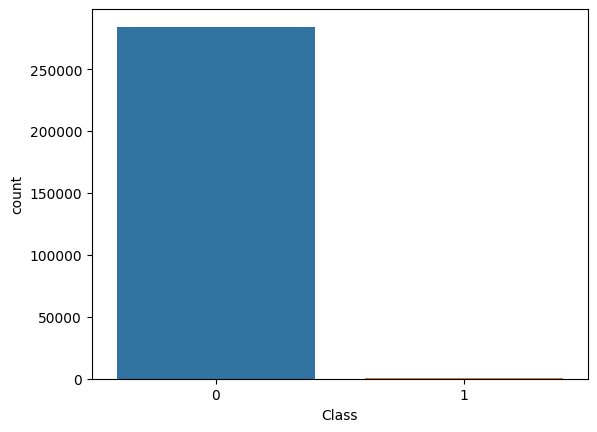

In [72]:
sns.countplot(x='Class', data=df)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [74]:
df.isna().sum().sum()

0

In [75]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [76]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Density'>

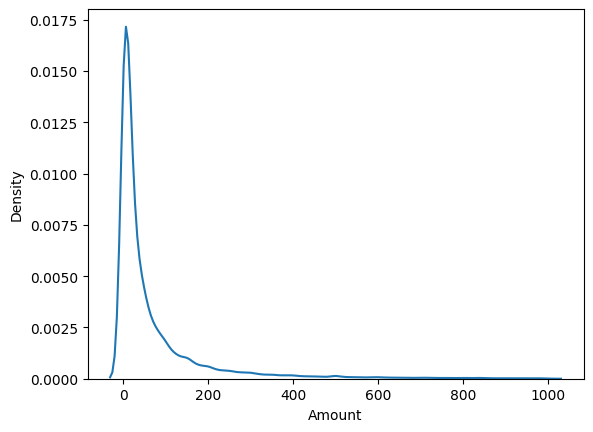

In [77]:
sns.kdeplot(x='Amount', data=df[(df['Amount']<1000)])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Count'>

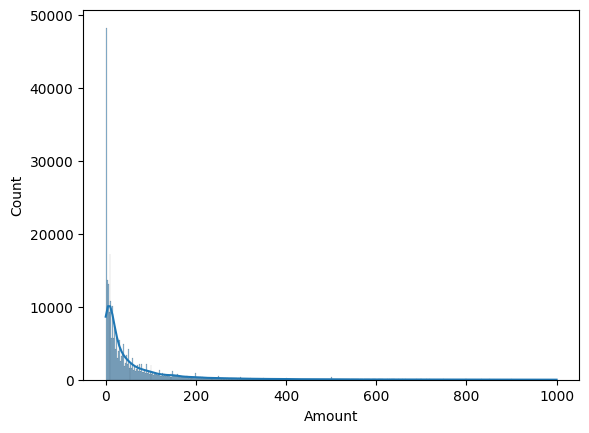

In [78]:
sns.histplot(x='Amount', data=df[(df['Amount']<1000)], kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


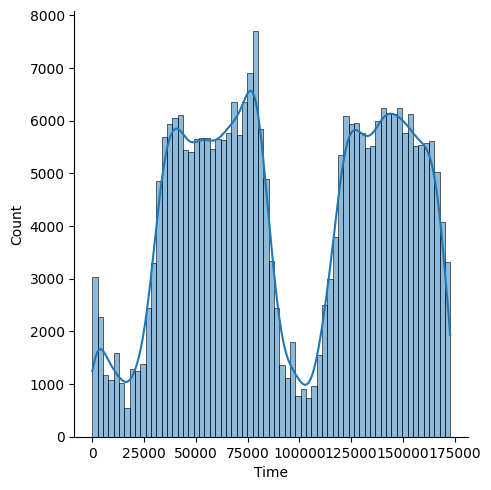

In [79]:
sns.displot(x='Time', data=df, kde=True)

In [80]:
df[(df['Class']==1)].shape

(492, 31)

In [81]:
df = df.sample(frac=1)
normal_df = pd.concat([df[df['Class']==1], df[df['Class']==0].iloc[:492,:]], axis=0).sample(frac=1)
normal_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
251881,155542.0,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,-1.551839,...,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,3.14,1
56703,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76,1
74496,55614.0,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,...,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1


In [82]:
normal_df.shape

(984, 31)

<Axes: xlabel='Class', ylabel='count'>

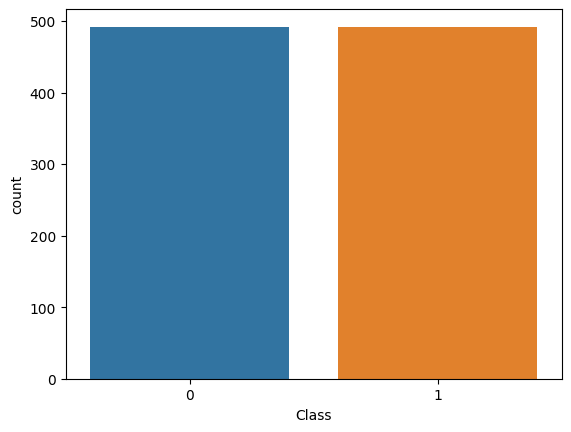

In [83]:
sns.countplot(x='Class', data=normal_df)

In [84]:
corr_df = normal_df.corr(numeric_only=True)
corr_df = corr_df['Class'].sort_values()
cols = corr_df[(corr_df<-0.5) | (corr_df>0.2)].index.values[:-1]

In [85]:
cols

array(['V14', 'V12', 'V10', 'V16', 'V3', 'V9', 'V17', 'V20', 'V19', 'V2',
       'V11', 'V4'], dtype=object)

In [86]:
len(cols)

12

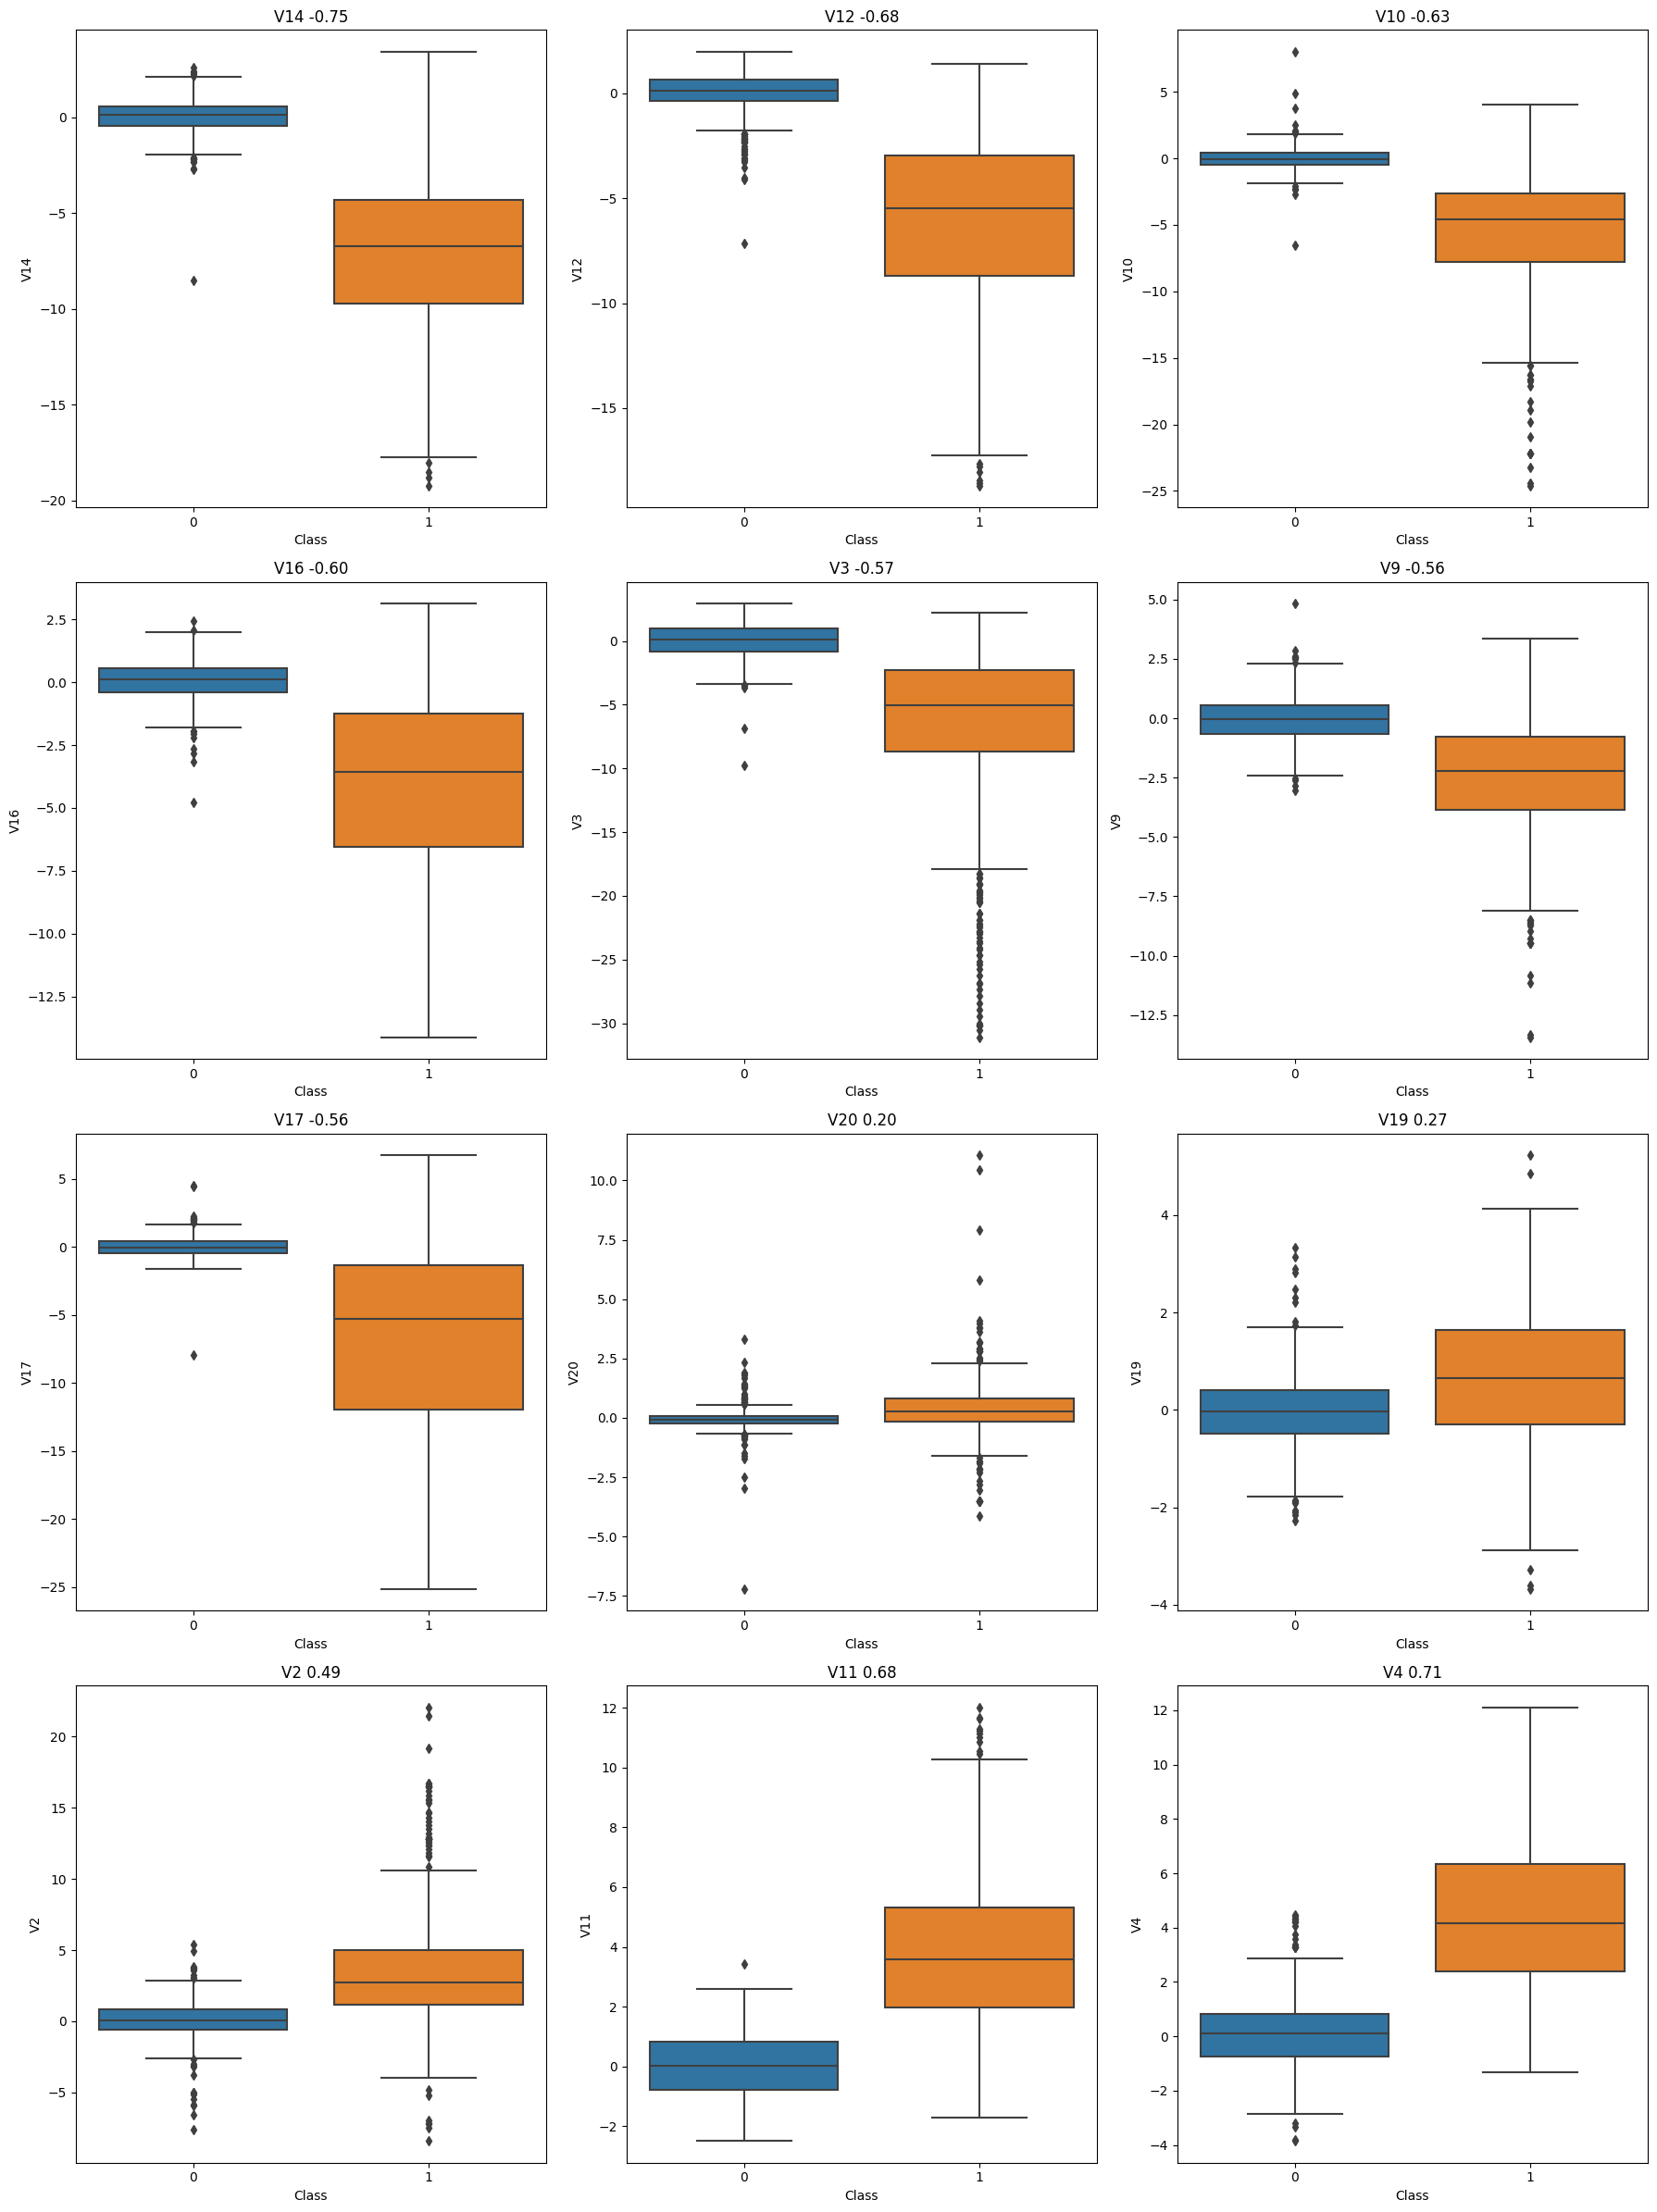

In [87]:
r = 4
c = 3
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(18, 6*r))
axes = axes.flatten()

for i in range(0, len(cols)):
    sns.boxplot(y=cols[i], data=normal_df, x='Class', ax=axes[i])
    axes[i].set_title(f'{cols[i]} {corr_df[cols[i]]:.2f}')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

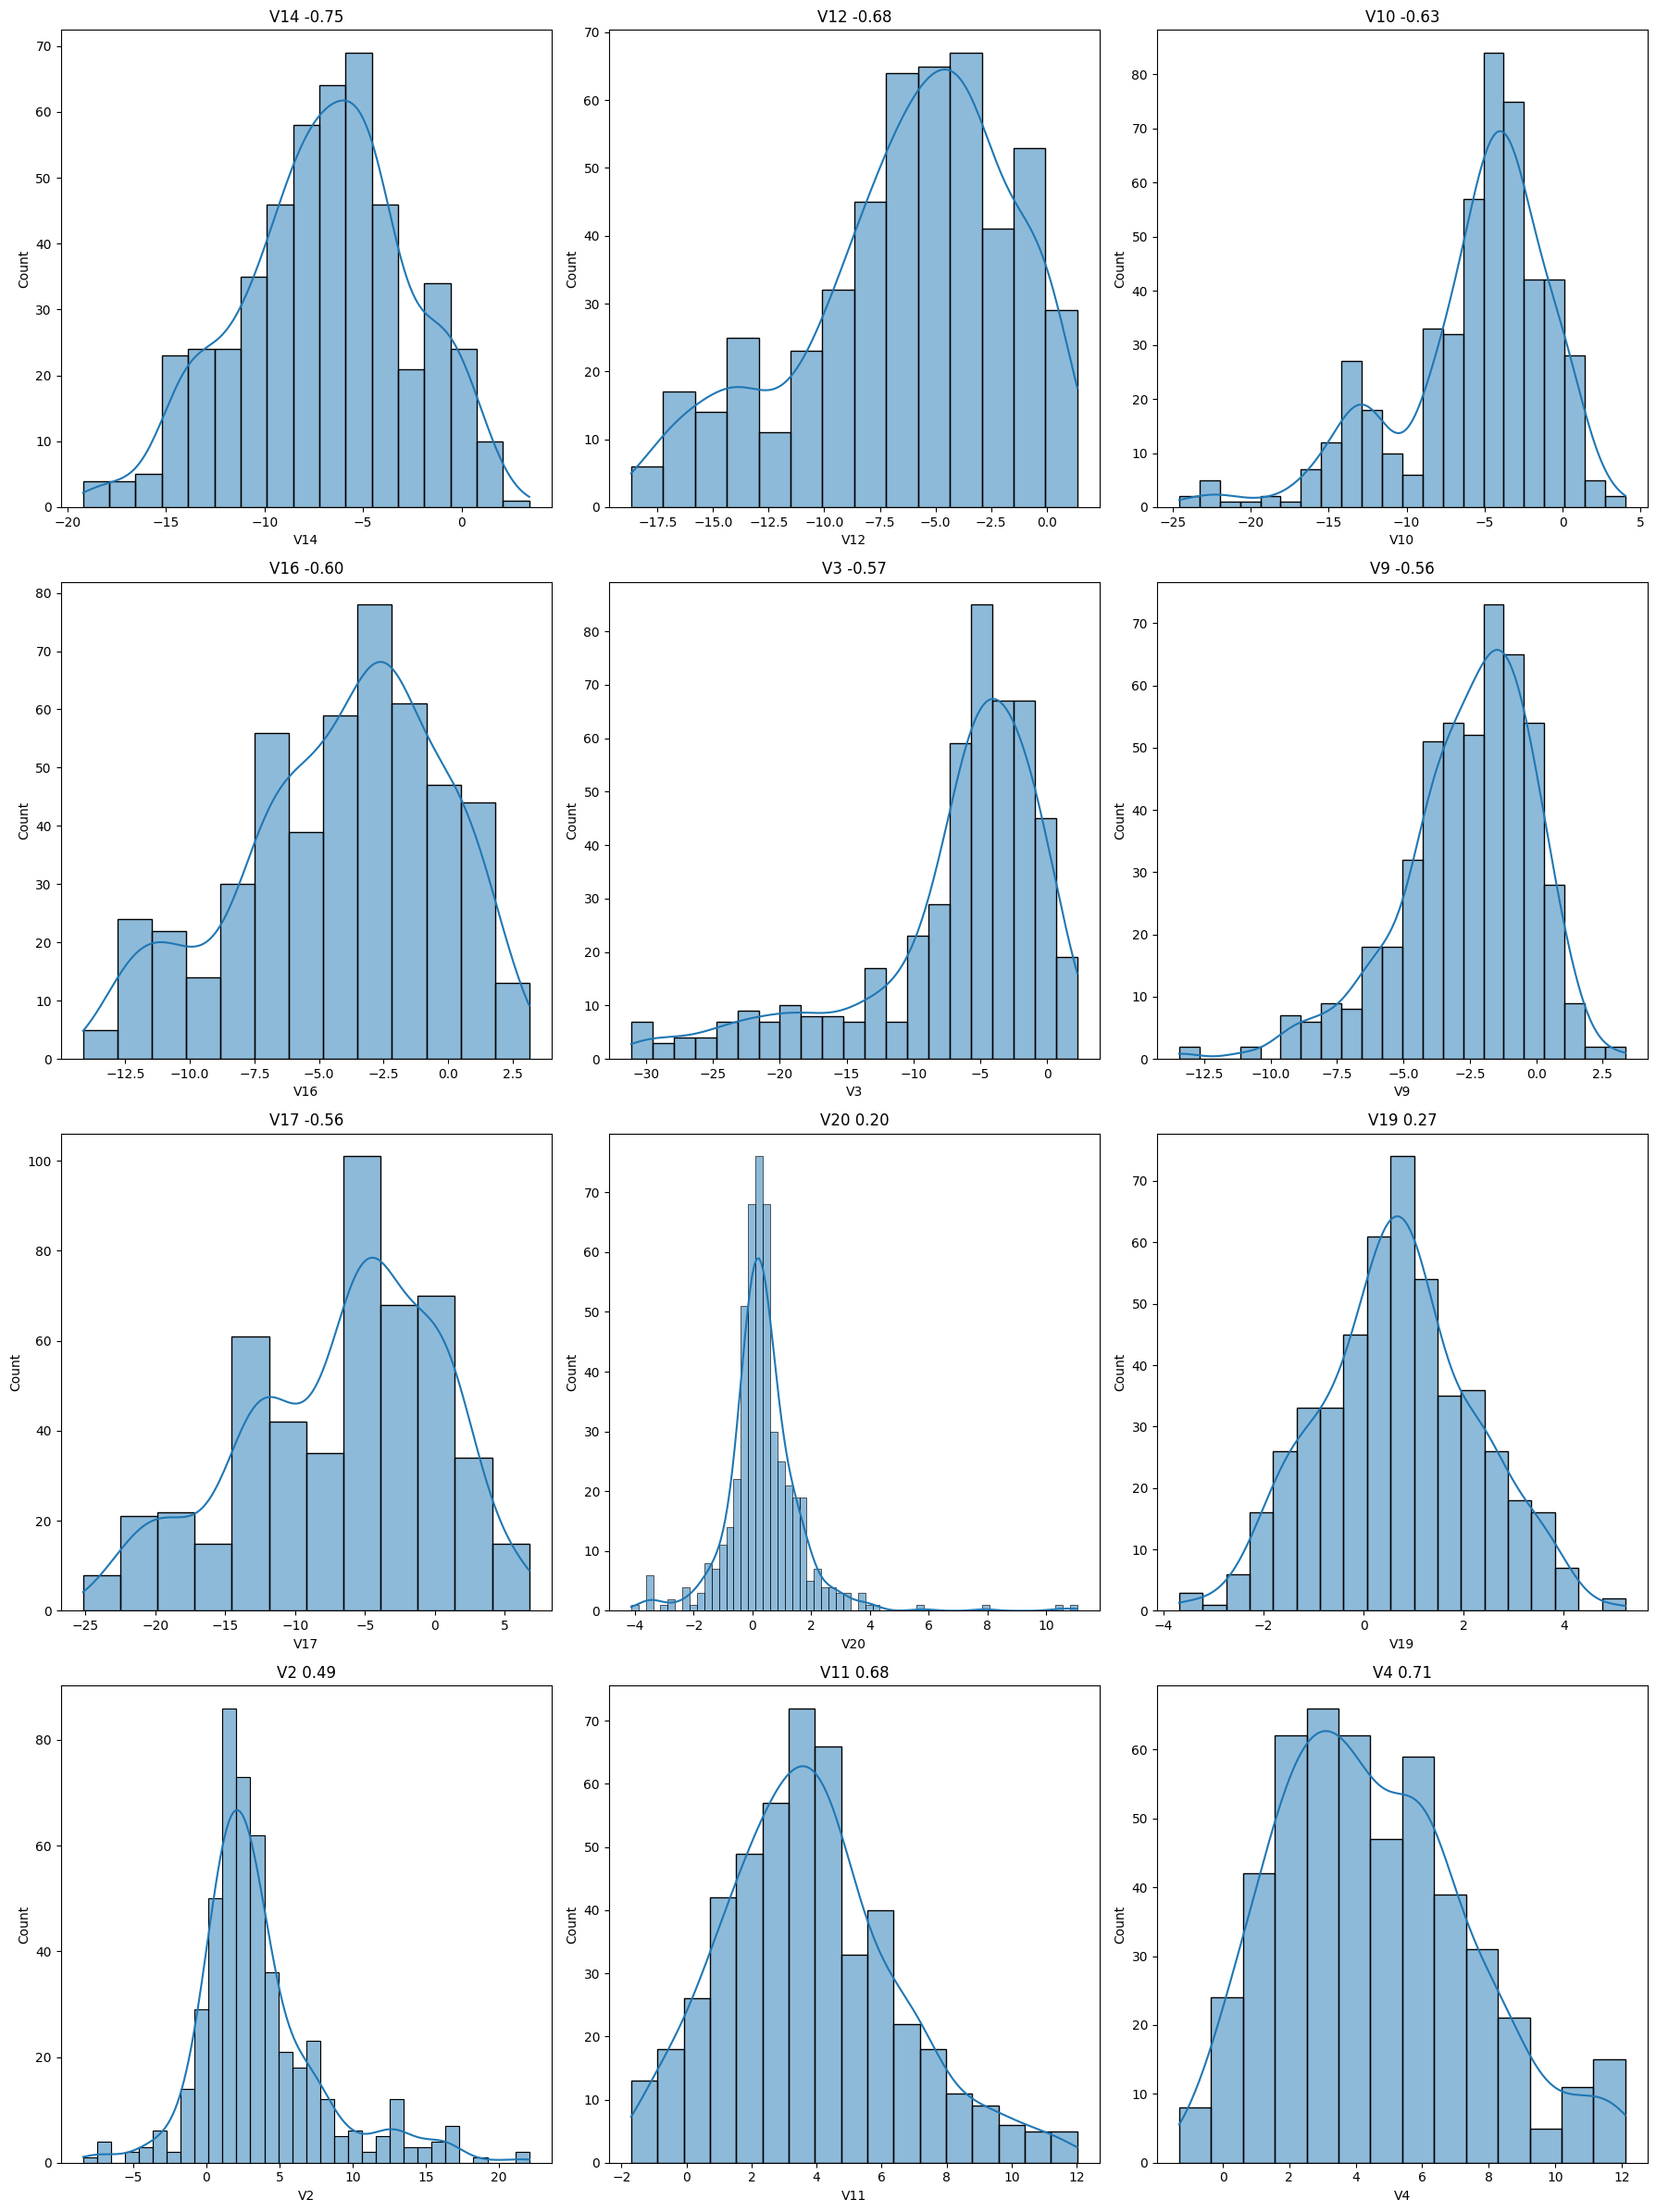

In [88]:
r = 4
c = 3
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(18, 6*r))
axes = axes.flatten()

for i in range(0, len(cols)):
    sns.histplot(x=cols[i], data=normal_df[normal_df['Class']==1], ax=axes[i], kde=True)
    axes[i].set_title(f'{cols[i]} {corr_df[cols[i]]:.2f}')

plt.tight_layout()
plt.show()

In [89]:
for col in cols[:3]:
    df_col = df[df['Class']==1][col]
    q25, q75 = np.percentile(df_col, 25), np.percentile(df_col, 75)
    cutoff = (q75-q25)*1.5
    lower, upper = q25-cutoff, q75+cutoff
    normal_df = normal_df.drop(normal_df[(normal_df[col]>upper)|(normal_df[col]<lower)].index.values, axis=0)
    print(normal_df.shape)

(980, 31)
(976, 31)
(956, 31)


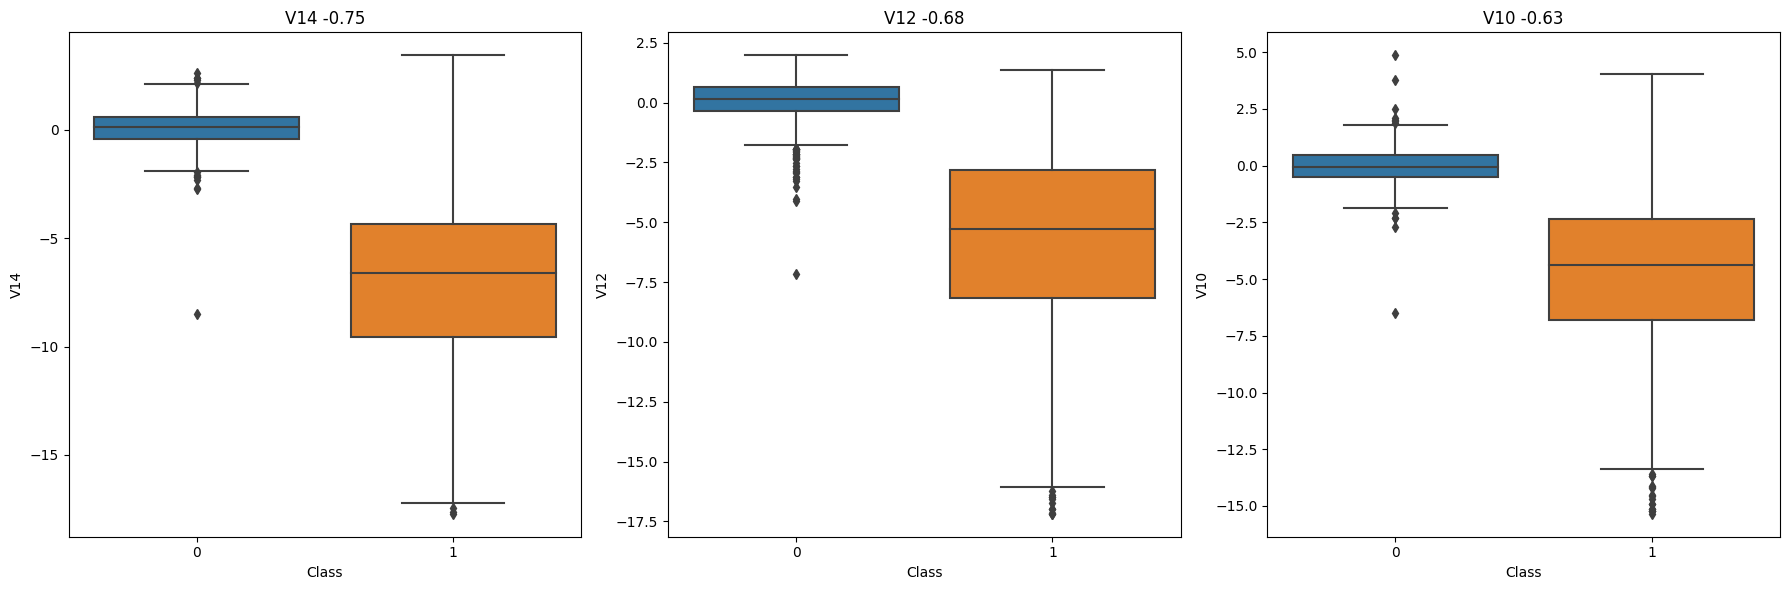

In [90]:
r = 1
c = 3
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(18, 6*r))
axes = axes.flatten()

for i in range(0, 3):
    sns.boxplot(y=cols[i], data=normal_df, x='Class', ax=axes[i])
    axes[i].set_title(f'{cols[i]} {corr_df[cols[i]]:.2f}')

plt.tight_layout()
plt.show()

In [91]:
# y = df['Class']
# x = df.drop(['Class'], axis=1)

y = normal_df['Class']
x = normal_df.drop(['Class'], axis=1)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31, stratify=y)

In [93]:
((y_train == 1).sum()/y_train.shape[0])*100

48.57997010463378

In [94]:
((y_test == 1).sum()/y_test.shape[0])*100

48.78048780487805

In [95]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(df.drop(['Class'], axis=1), df['Class'], test_size=0.9, random_state=312, stratify=df['Class'])
print(x_train_org[y_train_org==1].shape[0]/x_train_org.shape[0])
print(x_test_org[y_test_org==1].shape[0]/x_test_org.shape[0])
x_test = x_test_org
y_test = y_test_org

0.001720505617977528
0.0017282611664007303


In [96]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
y_pred.dtype

dtype('int64')

In [98]:
y_pred.shape

(256327,)

In [99]:
y_test.dtype

dtype('int64')

In [100]:
y_test.sum()

443

In [101]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([255884,    443]))

In [102]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([242514,  13813]))

In [103]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [104]:
precision

array([0.00172826, 0.02982697, 1.        ])

In [105]:
recall

array([1.        , 0.93002257, 0.        ])

In [106]:
thresholds

array([0, 1])

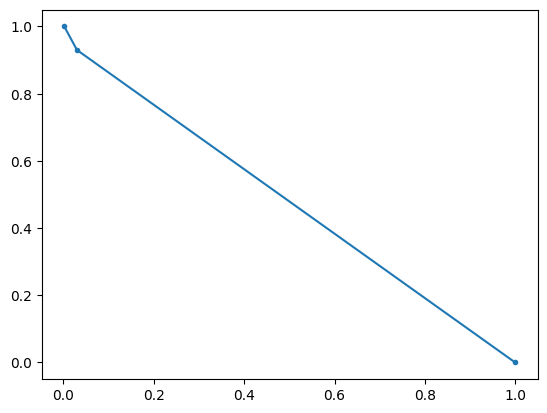

In [107]:
plt.plot(precision, recall, marker='.')

In [108]:
confusion_matrix(y_test, y_pred)

array([[242483,  13401],
       [    31,    412]])

In [109]:
tp = 116
fp = 40
tn = 85245
fn = 42

In [110]:
tp/(tp+fp)

0.7435897435897436

In [111]:
tp/(tp+fn)

0.7341772151898734

In [112]:
# At threshold 0
precision_at_0 = (tp+fn)/(tp+fp+tn+fn)
print(precision_at_0)
recall_at_0 = (tp+fn)/(tp+fn)
print(recall_at_0)

0.0018491860070456328
1.0


In [113]:
# At threshold 1
precision_at_1 = (tp)/(tp+fp)
print(precision_at_1)
recall_at_1 = (tp)/(tp+fn)
print(recall_at_1)

0.7435897435897436
0.7341772151898734


In [114]:
# The average_precision_score function computes the area under the precision-recall curve using the precision-recall AUC approach
average_precision_score(y_test, y_pred)

0.027860698932032375

In [115]:
roc_auc_score(y_test, y_pred)

0.9388255931643406

In [116]:
auc(precision, recall)

0.47825698244438275

In [117]:
x_train.shape

(669, 30)

In [118]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=23, sampling_strategy=0.2)
# x_train_sample, y_train_sample = smote.fit_resample(x_train, y_train)
# x_train_sample.shape

In [119]:
# y_train_sample.shape

In [120]:
# x_train = x_train_sample
# y_train = y_train_sample

In [121]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
213092,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47
263743,161095.0,-0.705155,1.863814,-2.075576,-0.033534,0.654618,-1.304994,0.187421,0.730871,-0.480172,...,-0.179178,0.281724,0.716008,-0.218626,-0.635896,-0.294912,-0.140571,0.035913,0.058480,1.00
81186,58822.0,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,...,-0.141533,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,45.64
251904,155554.0,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,...,1.054390,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,94.82
274541,166073.0,-4.496184,-5.002847,1.108133,0.374191,3.165220,-1.171172,-2.956272,1.263446,1.050701,...,1.419868,0.533050,-0.181972,-0.161905,-0.033967,-0.149140,-0.081980,0.112379,-0.715237,52.00


the RobustScaler is a feature scaling technique that is particularly useful when your data contains outliers. It scales features by removing the median and scaling the data according to the interquartile range (IQR), which makes it more robust to outliers compared to standard scaling methods like StandardScaler or MinMaxScaler

In [122]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
x_train.loc[:, ['Amount', 'Time']] = pd.DataFrame(rob.fit_transform(x_train[['Amount', 'Time']]), columns=['Amount', 'Time']).values

In [123]:
x_test.loc[:, ['Amount', 'Time']] = pd.DataFrame(rob.transform(x_test[['Amount', 'Time']]), columns=['Amount', 'Time']).values

In [124]:
x_train.isna().sum().sum()

0

In [125]:
x_test.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
185201,0.538546,2.133947,-1.107241,-0.456913,-0.850340,-1.048604,-0.105881,-1.226079,0.022810,0.314241,...,0.034943,0.432174,1.345556,0.091807,0.666415,-0.084391,-0.001033,0.021228,-0.038322,0.073487
159074,0.377550,2.113237,0.072626,-2.218945,-0.008134,1.140653,0.265690,0.049073,0.011670,0.302432,...,-0.101420,-0.389864,-1.035047,0.173880,-0.849856,-0.128094,0.238440,-0.064277,-0.053901,-0.185395
88438,-0.182103,-1.301619,0.174099,2.385029,0.053318,-0.719295,-0.064001,-0.379230,-0.683079,0.612543,...,-0.189823,0.557622,-0.586637,-0.098616,0.469034,-0.027857,1.075953,-0.036627,0.142578,0.486055
114941,-0.052987,-1.176924,0.991351,-0.509055,-0.936545,1.962382,3.848845,-0.641830,0.614505,0.006361,...,-0.150345,0.729744,-0.287604,0.015097,1.040831,0.070277,0.378826,0.163816,0.118868,-0.041778
11238,-0.659083,-2.365047,-1.072574,1.622208,1.770872,1.335970,-0.398003,-1.284185,0.767320,0.394365,...,0.630722,0.377706,0.472104,-0.188380,-0.316126,-0.086260,-0.198395,0.049623,-0.297412,0.115727


In [126]:
x_test.isna().sum().sum()

0

In [127]:
# raise SystemExit()

0.06675868615356614
0.9405724564174519
[0 1]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

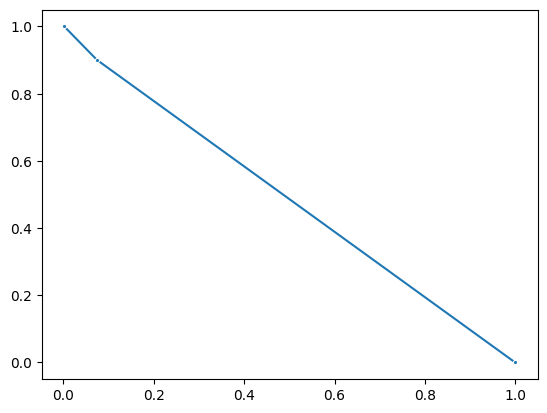

In [128]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(average_precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(thresholds)
sns.lineplot(x=precision, y=recall, marker='.')

0.052683550284646344
0.9791446880928303
[0 1]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

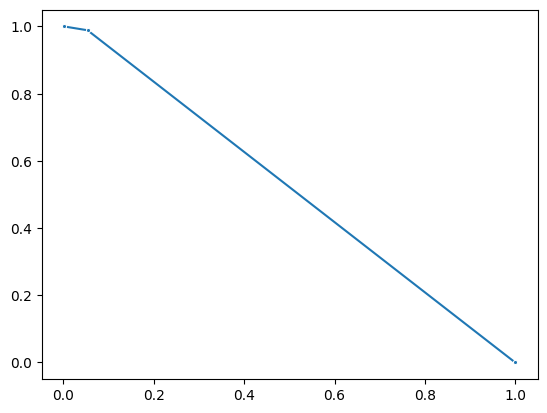

In [129]:
# np.unique(y_pred) is used as thresholds
# area under precision recall curve is good measure as it takes into account both

from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(class_weight='balanced')
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(average_precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(thresholds)
sns.lineplot(x=precision, y=recall, marker='.')

0.038150741114773554
0.9730208194648583
[0 1]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

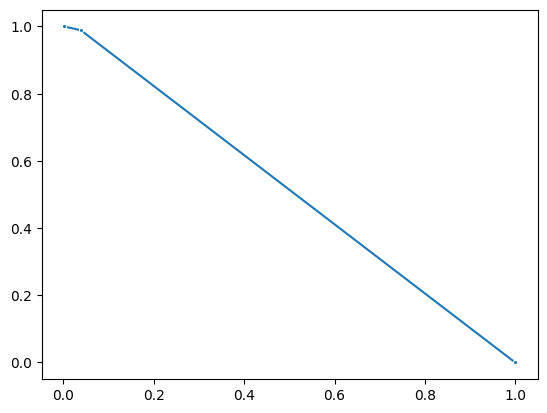

In [130]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(average_precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(thresholds)
sns.lineplot(x=precision, y=recall, marker='.')

In [131]:
x_train[y_train==0].shape

(344, 30)

0.0032312463487948386
0.7292362090003184
[0 1]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

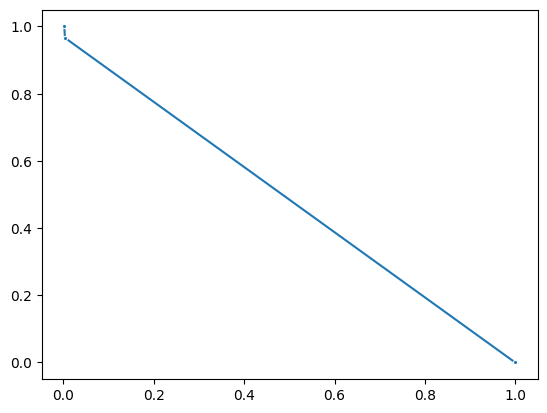

In [132]:

from sklearn.svm import OneClassSVM

model = OneClassSVM()
x_normal = x_train[y_train==0]
model.fit(x_normal)
y_pred = model.predict(x_test)
y_pred = [1 if x==-1 else 0 for x in y_pred]
print(average_precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(thresholds)
sns.lineplot(x=precision, y=recall, marker='.')